# PROJECT 4 PART 1
## Metabolic Syndrome Prediction
- Student's Name `Luke Kivumbi`

In [4]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
#loading the data
df = pd.read_csv('Metabolic  Syndrome.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2401 entries, 0 to 2400
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   seqn               2401 non-null   int64  
 1   Age                2401 non-null   int64  
 2   Sex                2401 non-null   object 
 3   Marital            2193 non-null   object 
 4   Income             2284 non-null   float64
 5   Race               2401 non-null   object 
 6   WaistCirc          2316 non-null   float64
 7   BMI                2375 non-null   float64
 8   Albuminuria        2401 non-null   int64  
 9   UrAlbCr            2401 non-null   float64
 10  UricAcid           2401 non-null   float64
 11  BloodGlucose       2401 non-null   int64  
 12  HDL                2401 non-null   int64  
 13  Triglycerides      2401 non-null   int64  
 14  MetabolicSyndrome  2401 non-null   object 
dtypes: float64(5), int64(6), object(4)
memory usage: 281.5+ KB


,seqn,Age,Sex,Marital,Income,Race,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome
0,62161,22,Male,Single,8200.0,White,81.0,23.3,0,3.88,4.9,92,41,84,No MetSyn
1,62164,44,Female,Married,4500.0,White,80.1,23.2,0,8.55,4.5,82,28,56,No MetSyn
2,62169,21,Male,Single,800.0,Asian,69.6,20.1,0,5.07,5.4,107,43,78,No MetSyn
3,62172,43,Female,Single,2000.0,Black,120.4,33.3,0,5.22,5.0,104,73,141,No MetSyn
4,62177,51,Male,Married,NaN,Asian,81.1,20.1,0,8.13,5.0,95,43,126,No MetSyn


- The target for this project is MetabolicSyndrome. That is whether someone is positive or not for Metabolic Syndrome. This is a classification case
- For our data one row represents one individual.
- This data set has 14 features plus the target.
- there're 2401 rows in the dataset
- in terms of dimensionality reduction for this dataset there's an opportunity of say joining one's sex and marital status into one feature, or one's sex and race or even marital and race. there's also the opportunity for joining age and sex or age sex and race. Further there's also an opportunity for income and sex, income and race.
- I foresee challenges of inconsistent values especially in the potential target columns of Sex, Marital, Race

# EXPLORING THE DATA

In [6]:
#checking for duplicates
df.duplicated().sum()

0

No duplicates

In [7]:
#checking for missing values
df.isna().sum()

seqn                   0
Age                    0
Sex                    0
Marital              208
Income               117
Race                   0
WaistCirc             85
BMI                   26
Albuminuria            0
UrAlbCr                0
UricAcid               0
BloodGlucose           0
HDL                    0
Triglycerides          0
MetabolicSyndrome      0
dtype: int64

There're missing values for Marital, Icome, BMI and WaistCircumfrance

In [8]:
#looking at numeric summery
df.describe()

,seqn,Age,Income,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides
count,2401.000000,2401.000000,2284.000000,2316.000000,2375.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000
mean,67030.674302,48.691795,4005.253940,98.307254,28.702189,0.154102,43.626131,5.489046,108.247813,53.369429,128.125364
std,2823.565114,17.632852,2954.032186,16.252634,6.662242,0.422780,258.272829,1.439358,34.820657,15.185537,95.322477
min,62161.000000,20.000000,300.000000,56.200000,13.400000,0.000000,1.400000,1.800000,39.000000,14.000000,26.000000
25%,64591.000000,34.000000,1600.000000,86.675000,24.000000,0.000000,4.450000,4.500000,92.000000,43.000000,75.000000
50%,67059.000000,48.000000,2500.000000,97.000000,27.700000,0.000000,7.070000,5.400000,99.000000,51.000000,103.000000
75%,69495.000000,63.000000,6200.000000,107.625000,32.100000,0.000000,13.690000,6.400000,110.000000,62.000000,150.000000
max,71915.000000,80.000000,9000.000000,176.000000,68.700000,2.000000,5928.000000,11.300000,382.000000,156.000000,1562.000000


- Features of 'Albuminuria',	'UrAlbCr',	'UricAcid',	'BloodGlucose',	'HDL' and 'Triglycerides' seem to have some outlier values especially given that the maximum values is way above the 75% value. this will need some visualisation to establish their true nature.

<Axes: xlabel='Triglycerides'>

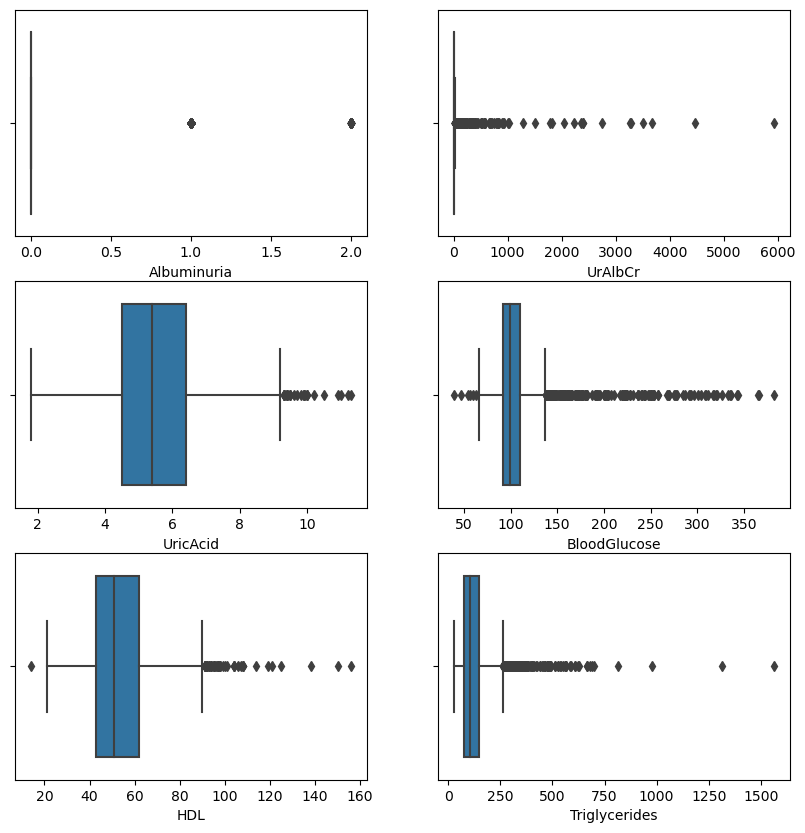

In [9]:
#visualising Albuminuria	UrAlbCr	UricAcid	BloodGlucose	HDL	Triglycerides in a scatter plot or boxplot
fig, axes = plt.subplots(ncols=2, nrows=3, figsize=(10,10))
sns.boxplot(data=df, x='Albuminuria', ax=axes[0,0])
sns.boxplot(data=df, x='UrAlbCr', ax=axes[0,1])
sns.boxplot(data=df, x='UricAcid', ax=axes[1,0])
sns.boxplot(data=df, x='BloodGlucose', ax=axes[1,1])
sns.boxplot(data=df, x='HDL', ax=axes[2,0])
sns.boxplot(data=df, x='Triglycerides', ax=axes[2,1])

The two values of Albuminuria need to be addressed

In [10]:
#looking at outlier values of Albuminuria
df.Albuminuria.value_counts()

0    2089
1     254
2      58
Name: Albuminuria, dtype: int64

From the looks of things this seems to be an ordered class where one's levels fall in either 0,1 or 2

In [11]:
#looking at the object datatypes
df.describe(include='object')

,Sex,Marital,Race,MetabolicSyndrome
count,2401,2193,2401,2401
unique,2,5,6,2
top,Female,Married,White,No MetSyn
freq,1211,1192,933,1579


In [12]:
#looking at value counts for all object features
df.Sex.value_counts(dropna=False)

Female    1211
Male      1190
Name: Sex, dtype: int64

that is okay

In [13]:
#looking at value counts for all object features
df.Marital.value_counts(dropna=False)

Married      1192
Single        498
Divorced      242
NaN           208
Widowed       166
Separated      95
Name: Marital, dtype: int64

Also this seems to be okay with no inconsistencies

In [14]:
#looking at value counts for all object features
df.Race.value_counts(dropna=False)

White          933
Black          548
Asian          349
Hispanic       257
MexAmerican    253
Other           61
Name: Race, dtype: int64

No inconsistencies

In [15]:
#looking at value counts for all object features
df.MetabolicSyndrome.value_counts(dropna=False)

No MetSyn    1579
MetSyn        822
Name: MetabolicSyndrome, dtype: int64

will need to change to 0 and 1

In [16]:
#replacing values in MetabolicSyndrome with 0 or 1
df['MetabolicSyndrome'] = df['MetabolicSyndrome'].replace({'MetSyn':1, 'No MetSyn':0})
df.MetabolicSyndrome.value_counts()

0    1579
1     822
Name: MetabolicSyndrome, dtype: int64

In [17]:
#preprocessing the data
# Preprocessing tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector
# Models
from sklearn.ensemble import RandomForestClassifier
from sklearn import set_config
set_config(transform_output='pandas')

In [18]:
#splitting the data
X = df.drop(['MetabolicSyndrome', 'seqn'], axis=1)
y = df['MetabolicSyndrome']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train.head()

,Age,Sex,Marital,Income,Race,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides
263,46,Female,Married,8200.0,White,124.0,40.8,0,18.47,3.3,140,53,198
2073,34,Male,Separated,3500.0,MexAmerican,86.2,24.5,0,16.14,6.1,114,83,60
632,33,Female,Married,3500.0,MexAmerican,75.0,25.0,0,11.54,3.4,97,44,60
1732,49,Female,Married,9000.0,Hispanic,95.7,33.3,0,3.81,2.7,89,51,139
765,30,Male,Married,9000.0,Asian,75.7,21.9,0,7.76,7.1,81,58,394


In [19]:
#preprocessing the data
#for categorical columns
cat_cols = X_train.select_dtypes(include='object').columns
print('Categorical columns', cat_cols)
#impute missing values
imputer = SimpleImputer(strategy='constant', fill_value='missing')
#encoding
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
cat_pipe = make_pipeline(imputer, encoder)
#categorical tuple
cat_tuple = ('Categorical',cat_pipe, cat_cols)
#ordinal column
ord_cols = ['Albuminuria']
print('Ordinal columns', ord_cols)
ord_encoder = OrdinalEncoder()
scaler = StandardScaler()
ord_pipe = make_pipeline(ord_encoder, scaler)
#ordinal tuple
ord_tuple = ('Ordinal', ord_pipe, ord_cols)
#numeric columns
num_cols = X_train.select_dtypes(include=["number"]).drop(columns=['Albuminuria']).columns
print('Numeric columns', num_cols)
#imputer
num_imp = SimpleImputer(strategy='median')
#scaler
scaler = StandardScaler()
num_pipe = make_pipeline(num_imp, scaler)
#numeric tuple
num_tuple = ('Numeric', num_pipe, num_cols)
num_tuple

Categorical columns Index(['Sex', 'Marital', 'Race'], dtype='object')
Ordinal columns ['Albuminuria']
Numeric columns Index(['Age', 'Income', 'WaistCirc', 'BMI', 'UrAlbCr', 'UricAcid',
       'BloodGlucose', 'HDL', 'Triglycerides'],
      dtype='object')


('Numeric',
 Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                 ('standardscaler', StandardScaler())]),
 Index(['Age', 'Income', 'WaistCirc', 'BMI', 'UrAlbCr', 'UricAcid',
        'BloodGlucose', 'HDL', 'Triglycerides'],
       dtype='object'))

In [20]:
#preprocessor 
preprocessor = ColumnTransformer([cat_tuple, ord_tuple, num_tuple], verbose_feature_names_out=False)
preprocessor

ColumnTransformer(transformers=[('Categorical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['Sex', 'Marital', 'Race'], dtype='object')),
                                ('Ordinal',
                                 Pipeline(steps=[('ordinalencoder',
                                                  OrdinalEncoder()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Albuminuria']),
                                ('Numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['Age', 'Income', 'WaistCirc', 'BMI', 'UrAlbCr', 'UricAcid',
       'BloodGlucose', 'HDL', 'Triglycerides'],
      dtype='object'))],
                  verbose_feature_names_out=False)

In [21]:
#model
rfc = RandomForestClassifier(random_state=42)
#model pipeline
model = make_pipeline(preprocessor, rfc)
model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('Categorical',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['Sex', 'Marital', 'Race'], dtype='object')),
                                                 ('Ordinal',
                                                  Pipeline(steps=[('ordinalencoder',
                                                                   Ordi...
                                                  ['Albuminuria']),
                                                 ('Numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'Income', 'WaistCirc', 'BMI', 'UrAlbCr', 'UricAcid',
       'BloodGlucose', 'HDL', 'Triglycerides'],
      dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

In [22]:
#fitting model
model.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('Categorical',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['Sex', 'Marital', 'Race'], dtype='object')),
                                                 ('Ordinal',
                                                  Pipeline(steps=[('ordinalencoder',
                                                                   Ordi...
                                                  ['Albuminuria']),
                                                 ('Numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'Income', 'WaistCirc', 'BMI', 'UrAlbCr', 'UricAcid',
       'BloodGlucose', 'HDL', 'Triglycerides'],
      dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

## Custom Evaluation function

In [23]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
def classification_metrics(y_true, y_pred, label='',
                           output_dict=False, figsize=(8,4),
                           normalize='true', cmap='Blues',
                           colorbar=False):
  # Get the classification report
  report = classification_report(y_true, y_pred)
  ## Print header and report
  header = "-"*70
  print(header, f" Classification Metrics: {label}", header, sep='\n')
  print(report)
  ## CONFUSION MATRICES SUBPLOTS
  fig, axes = plt.subplots(ncols=2, figsize=figsize)
  # create a confusion matrix  of raw counts
  ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=None, cmap='gist_gray', colorbar=colorbar,
                ax = axes[0],);
  axes[0].set_title("Raw Counts")
  # create a confusion matrix with the test data
  ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=normalize, cmap=cmap, colorbar=colorbar,
                ax = axes[1]);
  axes[1].set_title("Normalized Confusion Matrix")
  # Adjust layout and show figure
  fig.tight_layout()
  plt.show()
  # Return dictionary of classification_report
  if output_dict==True:
    report_dict = classification_report(y_true, y_pred, output_dict=True)
    return report_dict

def evaluate_classification(model, X_train, y_train, X_test, y_test,
                         figsize=(6,4), normalize='true', output_dict = False,
                            cmap_train='Blues', cmap_test="Reds",colorbar=False):
  # Get predictions for training data
  y_train_pred = model.predict(X_train)
  # Call the helper function to obtain regression metrics for training data
  results_train = classification_metrics(y_train, y_train_pred, #verbose = verbose,
                                     output_dict=True, figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_train,
                                     label='Training Data')
  print()
  # Get predictions for test data
  y_test_pred = model.predict(X_test)
  # Call the helper function to obtain regression metrics for test data
  results_test = classification_metrics(y_test, y_test_pred, #verbose = verbose,
                                  output_dict=True,figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_test,
                                    label='Test Data' )
  if output_dict == True:
    # Store results in a dataframe if ouput_frame is True
    results_dict = {'train':results_train,
                    'test': results_test}
    return results_dict

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1182
           1       1.00      1.00      1.00       618

    accuracy                           1.00      1800
   macro avg       1.00      1.00      1.00      1800
weighted avg       1.00      1.00      1.00      1800



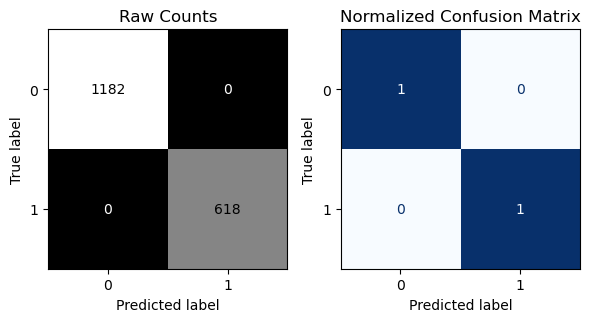


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.94      0.91       397
           1       0.87      0.77      0.82       204

    accuracy                           0.88       601
   macro avg       0.88      0.86      0.87       601
weighted avg       0.88      0.88      0.88       601



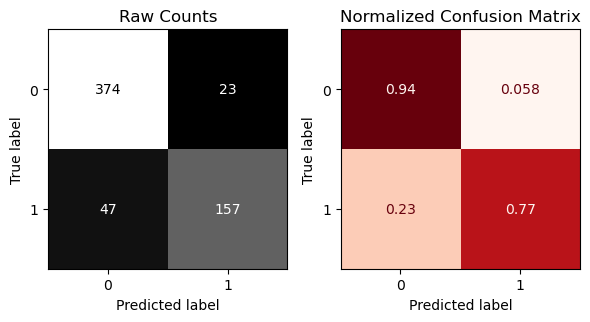

In [24]:
#evaluating model
evaluate_classification(model, X_train, y_train, X_test, y_test)

# Permutation importance(Extract and visualize the top 10 features )

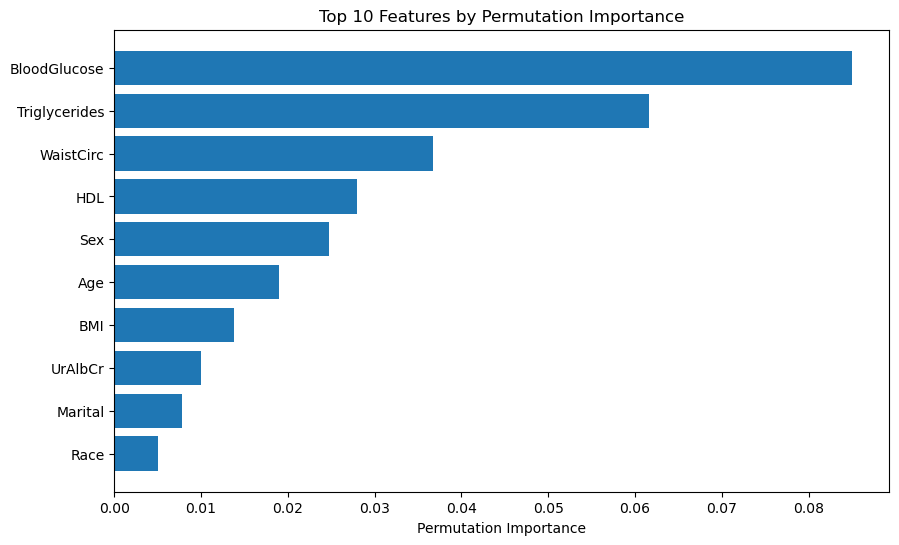

In [25]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
# Calculate permutation importance
perm_importance = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)

# Extract feature importances and names
feature_importance = perm_importance.importances_mean
feature_names = X.columns

# Sort feature importances and names
sorted_indices = feature_importance.argsort()[::-1]
sorted_feature_importance = feature_importance[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Plot the top 10 features
top_n = 10
plt.figure(figsize=(10, 6))
plt.barh(range(top_n), sorted_feature_importance[:top_n], align='center')
plt.yticks(range(top_n), sorted_feature_names[:top_n])
plt.xlabel('Permutation Importance')
plt.title('Top 10 Features by Permutation Importance')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.show()

## Observations
- The most important feature is BloodGluscoe. given that metabolic syndrome is a cluster of conditions that occur together, it would be sensible that bloodglucose would form part of the most importanat feature. this along with triglycerides and waist Circumfrance are important features in determining this condition. 

## Explanatory Visualizations for the most important features.

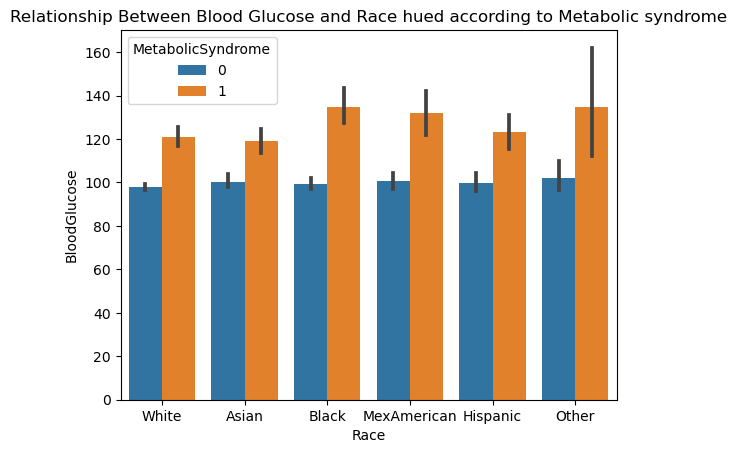

In [26]:
#visualising relationship between bloodglucose and Race
fig, ax = plt.subplots()
sns.barplot(data=df, y='BloodGlucose', x='Race', hue='MetabolicSyndrome')
ax.set_title('Relationship Between Blood Glucose and Race hued according to Metabolic syndrome');

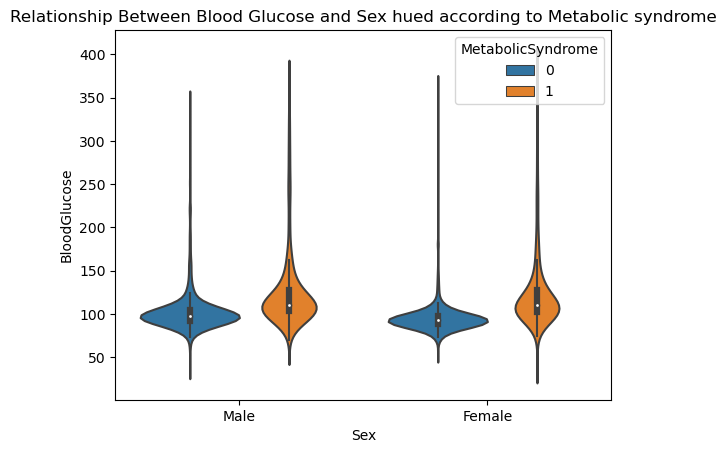

In [27]:
#visualising relationship between bloodglucose and target
fig, ax = plt.subplots()
sns.violinplot(data=df, y='BloodGlucose', x='Sex', hue='MetabolicSyndrome')
ax.set_title('Relationship Between Blood Glucose and Sex hued according to Metabolic syndrome');

- The races that seem to be at the most risk of metabolic syndrome are Black and Mexican Americans.
- both sexes show a bigger violin for members with Metabolic Syndrome than those without. the plot also shows that those with the syndrome have higher glucose levels that those without

# PART TWO.

In [28]:
#applying pca to get 3 principal components for the data
from sklearn.decomposition import PCA
pca = PCA(n_components=3, random_state=42)
X_train_tf = preprocessor.fit_transform(X_train)
X_test_tf = preprocessor.transform(X_test)
pca.fit(X_train_tf)

PCA(n_components=3, random_state=42)

In [29]:
#getting x_train_pca
X_train_pca = pca.transform(X_train_tf)
X_test_pca = pca.transform(X_test_tf)
X_test_pca.head()

,pca0,pca1,pca2
685,0.356337,-1.040123,1.366618
111,0.986577,-0.365298,-1.292826
1512,-0.197148,2.302556,-2.543591
1651,0.438149,-0.792265,0.482934
741,3.523487,1.385747,2.190392


In [30]:
X_train_pca.head()

,pca0,pca1,pca2
263,1.319839,-1.157142,-1.251156
2073,-1.519720,0.336558,-0.195914
632,-1.904998,-0.145953,0.613600
1732,-0.817140,-0.618495,-0.676716
765,-0.724204,-0.278185,2.697994


In [31]:
# Concatenate principal components with X_train, X_test
X_pca = pd.concat([X_train_pca, X_test_pca],axis=0)
X_pca.info()
X_pca.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2401 entries, 263 to 1934
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pca0    2401 non-null   float64
 1   pca1    2401 non-null   float64
 2   pca2    2401 non-null   float64
dtypes: float64(3)
memory usage: 75.0 KB


,pca0,pca1,pca2
263,1.319839,-1.157142,-1.251156
2073,-1.519720,0.336558,-0.195914
632,-1.904998,-0.145953,0.613600
1732,-0.817140,-0.618495,-0.676716
765,-0.724204,-0.278185,2.697994


In [32]:
#joinning X_tain_tf and X_test_tf
X_train_conc = pd.concat([X_train_tf, X_test_tf],axis=0)
X_train_conc.info()
X_train_conc.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2401 entries, 263 to 1934
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Sex_Female         2401 non-null   float64
 1   Sex_Male           2401 non-null   float64
 2   Marital_Divorced   2401 non-null   float64
 3   Marital_Married    2401 non-null   float64
 4   Marital_Separated  2401 non-null   float64
 5   Marital_Single     2401 non-null   float64
 6   Marital_Widowed    2401 non-null   float64
 7   Marital_missing    2401 non-null   float64
 8   Race_Asian         2401 non-null   float64
 9   Race_Black         2401 non-null   float64
 10  Race_Hispanic      2401 non-null   float64
 11  Race_MexAmerican   2401 non-null   float64
 12  Race_Other         2401 non-null   float64
 13  Race_White         2401 non-null   float64
 14  Albuminuria        2401 non-null   float64
 15  Age                2401 non-null   float64
 16  Income             240

,Sex_Female,Sex_Male,Marital_Divorced,Marital_Married,Marital_Separated,Marital_Single,Marital_Widowed,Marital_missing,Race_Asian,Race_Black,...,Albuminuria,Age,Income,WaistCirc,BMI,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides
263,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.366397,-0.176875,1.443579,1.591313,1.815754,-0.100646,-1.503810,0.962189,-0.045041,0.728110
2073,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.366397,-0.857407,-0.165173,-0.767163,-0.637064,-0.108892,0.406271,0.185052,1.929154,-0.704544
632,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.366397,-0.914117,-0.165173,-1.465971,-0.561824,-0.125171,-1.435593,-0.323077,-0.637299,-0.704544
1732,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.366397,-0.006742,1.717409,-0.174425,0.687157,-0.152526,-1.913113,-0.562196,-0.176654,0.115599
765,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,-0.366397,-1.084250,1.717409,-1.422296,-1.028311,-0.138548,1.088443,-0.801315,0.283992,2.762893


In [33]:
# Concatenate principal components with X_train, X_test
X_new = pd.concat([X_pca, X_train_conc],axis=1)
X_new.info()
X_new.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2401 entries, 263 to 1934
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pca0               2401 non-null   float64
 1   pca1               2401 non-null   float64
 2   pca2               2401 non-null   float64
 3   Sex_Female         2401 non-null   float64
 4   Sex_Male           2401 non-null   float64
 5   Marital_Divorced   2401 non-null   float64
 6   Marital_Married    2401 non-null   float64
 7   Marital_Separated  2401 non-null   float64
 8   Marital_Single     2401 non-null   float64
 9   Marital_Widowed    2401 non-null   float64
 10  Marital_missing    2401 non-null   float64
 11  Race_Asian         2401 non-null   float64
 12  Race_Black         2401 non-null   float64
 13  Race_Hispanic      2401 non-null   float64
 14  Race_MexAmerican   2401 non-null   float64
 15  Race_Other         2401 non-null   float64
 16  Race_White         240

,pca0,pca1,pca2,Sex_Female,Sex_Male,Marital_Divorced,Marital_Married,Marital_Separated,Marital_Single,Marital_Widowed,...,Albuminuria,Age,Income,WaistCirc,BMI,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides
263,1.319839,-1.157142,-1.251156,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,-0.366397,-0.176875,1.443579,1.591313,1.815754,-0.100646,-1.503810,0.962189,-0.045041,0.728110
2073,-1.519720,0.336558,-0.195914,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,-0.366397,-0.857407,-0.165173,-0.767163,-0.637064,-0.108892,0.406271,0.185052,1.929154,-0.704544
632,-1.904998,-0.145953,0.613600,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,-0.366397,-0.914117,-0.165173,-1.465971,-0.561824,-0.125171,-1.435593,-0.323077,-0.637299,-0.704544
1732,-0.817140,-0.618495,-0.676716,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,-0.366397,-0.006742,1.717409,-0.174425,0.687157,-0.152526,-1.913113,-0.562196,-0.176654,0.115599
765,-0.724204,-0.278185,2.697994,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,-0.366397,-1.084250,1.717409,-1.422296,-1.028311,-0.138548,1.088443,-0.801315,0.283992,2.762893


In [34]:
# Variance explained by PCA
pca.explained_variance_ratio_.sum()

0.46484353064174255

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1182
           1       1.00      1.00      1.00       618

    accuracy                           1.00      1800
   macro avg       1.00      1.00      1.00      1800
weighted avg       1.00      1.00      1.00      1800



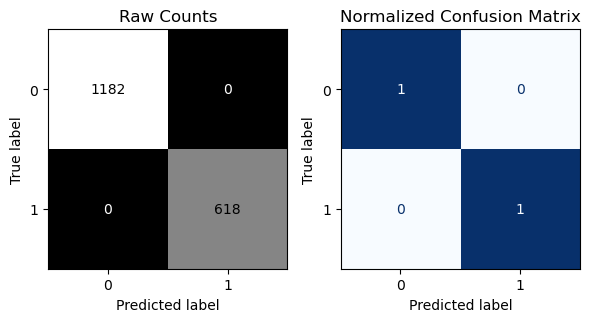


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.85      0.84       397
           1       0.69      0.64      0.66       204

    accuracy                           0.78       601
   macro avg       0.76      0.75      0.75       601
weighted avg       0.78      0.78      0.78       601



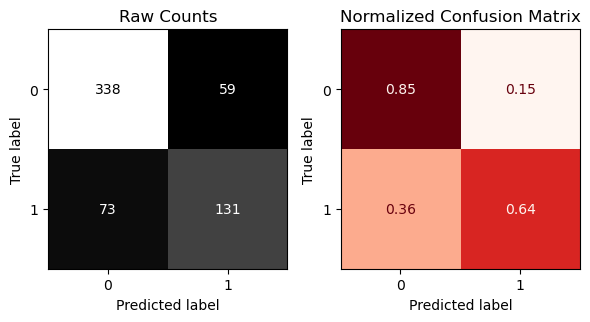

In [35]:
#Fitting and evaluating model on new features
rfc.fit(X_train_pca, y_train)
evaluate_classification(rfc, X_train_pca, y_train, X_test_pca, y_test)

- while the first model performed at 88%, this model with just 3 features performs at 78% which is impressive given the reduction in feature space.
- The recall for predicting whether one has metabolic syndrome is 77 for the first model and just 64 for this model. this would be reduced efficiency but with our second model only accounting for less than 50% of the variation in the data, that is still impressive.

# Feature Selection

In [36]:
#defining feature matrix
X = X_new
y = df['MetabolicSyndrome']

In [37]:
# Train test split
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state=321)
X_train.head()

,pca0,pca1,pca2,Sex_Female,Sex_Male,Marital_Divorced,Marital_Married,Marital_Separated,Marital_Single,Marital_Widowed,...,Albuminuria,Age,Income,WaistCirc,BMI,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides
2291,1.724298,1.867877,-1.111231,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.989011,1.184188,-0.781291,0.593016,0.882781,0.627828,0.542706,0.454061,0.876250,0.665820
322,0.771861,-0.670519,-0.902654,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-0.366397,0.106680,-0.815519,1.104643,0.732301,-0.145059,-0.071249,-0.173627,-0.176654,0.001402
608,0.494528,-0.465518,-0.480310,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,-0.366397,0.617078,-0.507461,0.368399,0.626965,-0.091551,-0.071249,-0.233407,-0.505686,-0.621491
704,-2.684427,0.224452,0.601468,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,-0.366397,-1.140961,1.717409,-1.615716,-1.058407,-0.136601,-1.026290,-0.352966,1.336896,0.427045
428,0.912901,0.031125,-0.762557,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,-0.366397,1.637875,-0.815519,0.699085,0.310958,-0.118270,-0.207683,0.095382,-0.045041,0.696965


In [38]:
# Scale
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [39]:
#checking classs balance
df.MetabolicSyndrome.value_counts(1)

0    0.657643
1    0.342357
Name: MetabolicSyndrome, dtype: float64

In [40]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 42)
X_train_sm,y_train_sm = smote.fit_resample(X_train_scaled, y_train)
y_train_sm.value_counts()

1    1207
0    1207
Name: MetabolicSyndrome, dtype: int64

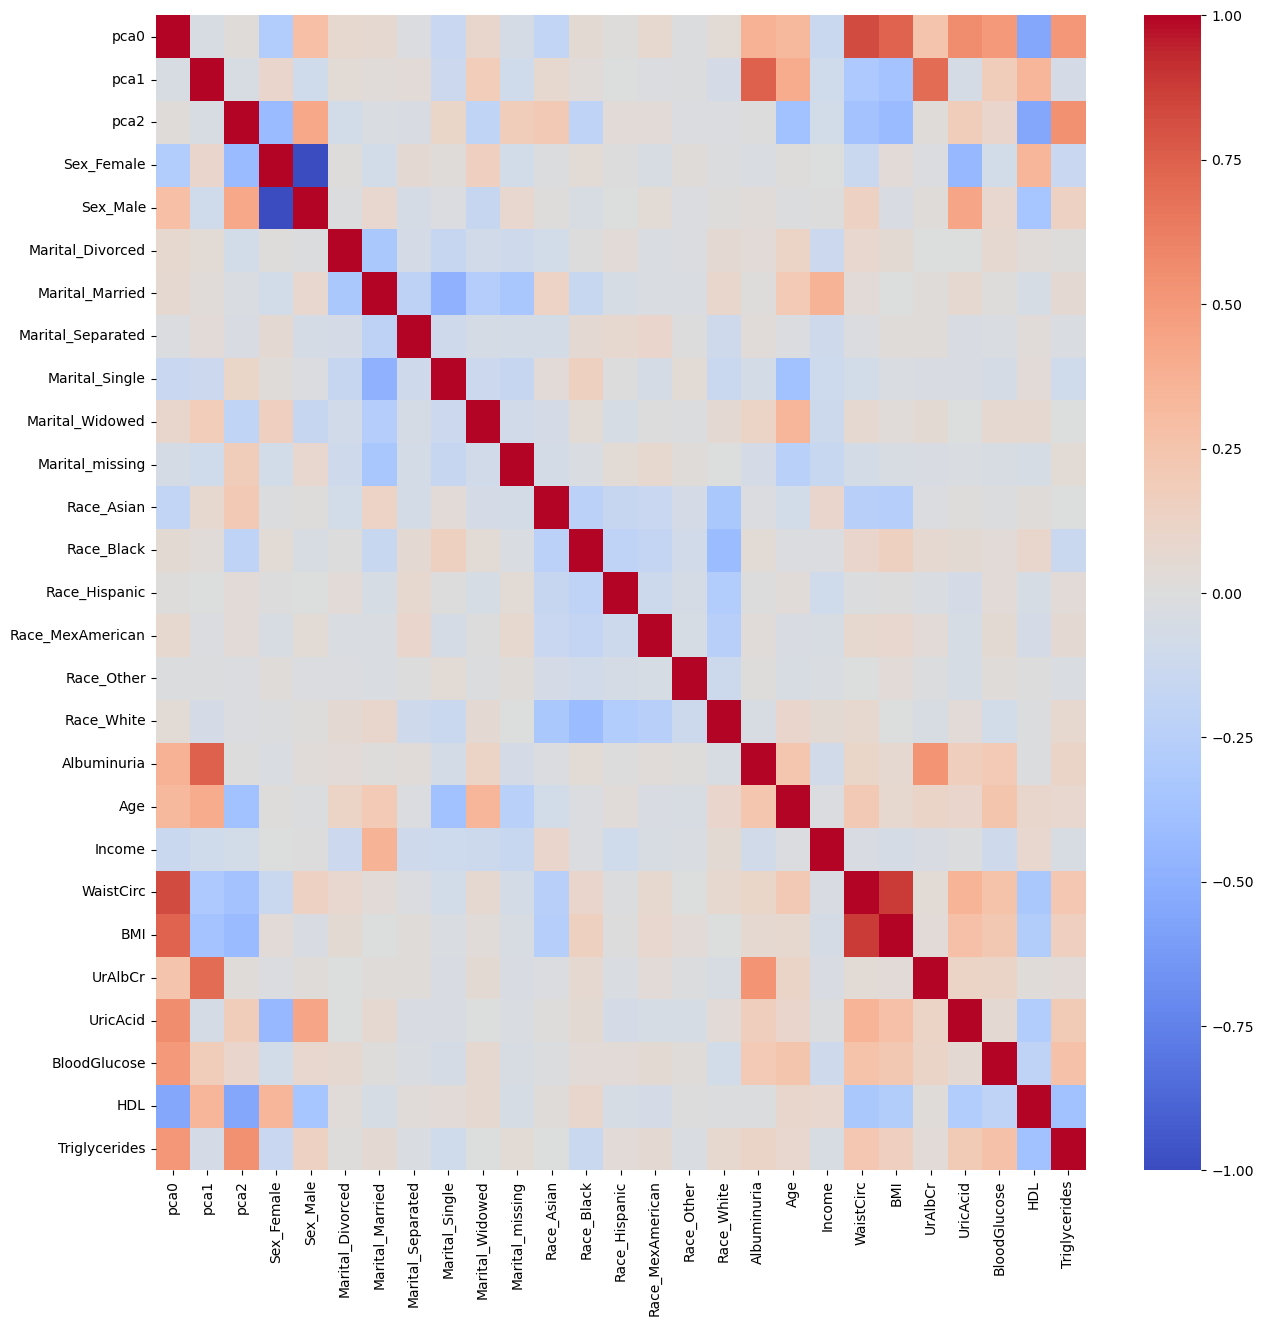

In [41]:
# Make a correlation heatmap of all features
corr = X_train_sm.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr,cmap='coolwarm');

In [42]:
from collinearity import SelectNonCollinear
from sklearn.feature_selection import f_classif

In [43]:
# Instantiate the selector, indicate theshold for r, also include the appropriate scoring metric for the task
selector = SelectNonCollinear(correlation_threshold = 0.75, scoring = f_classif)
# Fit the selector to the training data
selector.fit(X_train_sm.values, y_train_sm.values)

In [44]:
# Define a mask for filtering
non_collinear = selector.get_support()
non_collinear[:5]

[True, True, True, True, False]

In [45]:
# Check how many features are below the theshold
non_collinear.count(True)

25

In [46]:
# Check how many features are above the theshold
non_collinear.count(False)

2

In [47]:
# Make the T/F a series with the column names as the index
non_collinear_series = pd.Series(selector.get_support(), index=X_train_sm.columns)
non_collinear_series

pca0                  True
pca1                  True
pca2                  True
Sex_Female            True
Sex_Male             False
Marital_Divorced      True
Marital_Married       True
Marital_Separated     True
Marital_Single        True
Marital_Widowed       True
Marital_missing       True
Race_Asian            True
Race_Black            True
Race_Hispanic         True
Race_MexAmerican      True
Race_Other            True
Race_White            True
Albuminuria           True
Age                   True
Income                True
WaistCirc            False
BMI                   True
UrAlbCr               True
UricAcid              True
BloodGlucose          True
HDL                   True
Triglycerides         True
dtype: bool

In [48]:
# Filter training data
training_data_to_keep = X_train_sm.values[:, non_collinear]
# Filter column names
columns = np.array(X_train_sm.columns)[non_collinear]
# Make traing data into a dataframe
X_train_no_corr = pd.DataFrame(training_data_to_keep, columns = columns)

# Filter testing data
test_data_to_keep = X_test_scaled.values[:, non_collinear]
# Make test data into a dataframe
X_test_no_corr = pd.DataFrame(test_data_to_keep, columns = columns)

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1207
           1       1.00      1.00      1.00      1207

    accuracy                           1.00      2414
   macro avg       1.00      1.00      1.00      2414
weighted avg       1.00      1.00      1.00      2414



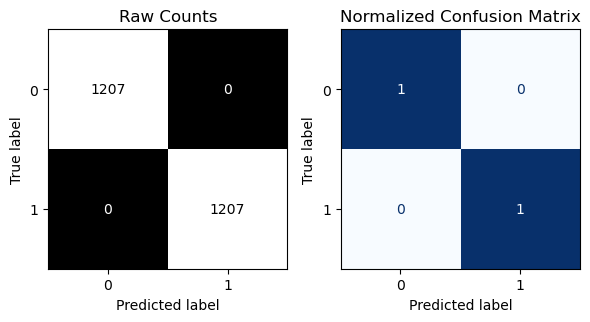


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.61      0.74      0.67       372
           1       0.36      0.24      0.29       229

    accuracy                           0.55       601
   macro avg       0.49      0.49      0.48       601
weighted avg       0.52      0.55      0.52       601



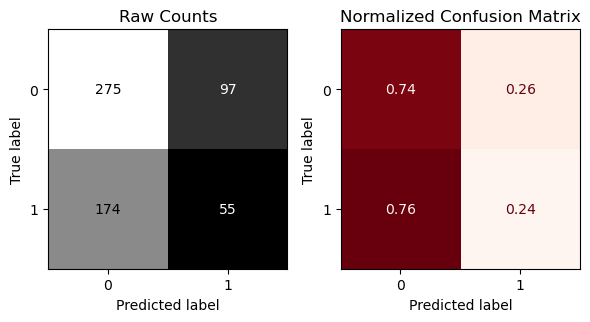

In [49]:
# Test the performance
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train_no_corr, y_train_sm)
evaluate_classification(rf_clf, X_train_no_corr, y_train_sm, X_test_no_corr, y_test)

with feature selection our accuracy has drastically fallen to just 55%

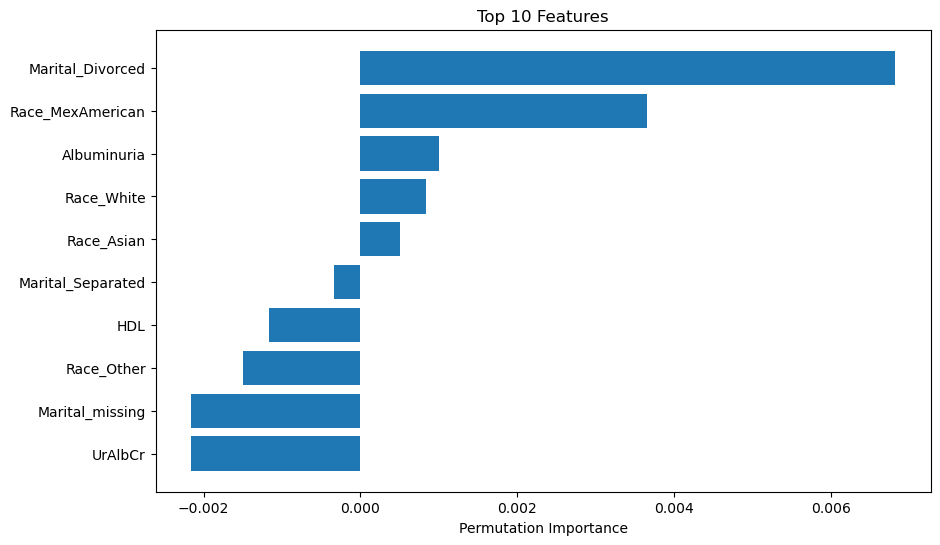

In [50]:
# Step 5: Extract and visualize the top 10 features using permutation importance
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# Calculate permutation importance
result = permutation_importance(rf_clf, X_test_no_corr, y_test, n_repeats=10, random_state=42)
sorted_idx = result.importances_mean.argsort()[-10:]

# Visualize top 10 features
plt.figure(figsize=(10, 6))
plt.barh(range(10), result.importances_mean[sorted_idx], align='center')
plt.yticks(range(10), X_test_no_corr.columns[sorted_idx])
plt.xlabel('Permutation Importance')
plt.title('Top 10 Features')
plt.show()

- These are definitely different features from the ones in the first case. here it seems race and marital status have quite a part to play in wheter one has the syndrome or not.

# PART 3


## CUSTOM FUNCTION

In [1]:
# Custom function for plotting each metric
def plot_history(history, figsize=(6,12), marker='o'):

    # Get list of metrics from history
    metrics = [c for c in history.history if not c.startswith('val_')]

    ## Separate row for each metric
    fig, axes = plt.subplots(nrows=len(metrics),figsize=figsize)

    # For each metric
    for i, metric_name in enumerate(metrics):

        # Get the axis for the current metric
        ax = axes[i]

        # Get metric from history.history
        metric_values = history.history[metric_name]
        # Get epochs from history
        epochs = history.epoch

        # Plot the training metric
        ax.plot(epochs, metric_values, label=metric_name, marker=marker)

        ## Check if val_{metric} exists. if so, plot:
        val_metric_name = f"val_{metric_name}"
        if val_metric_name in history.history:
            # Get validation values and plot
            metric_values = history.history[val_metric_name]
            ax.plot(epochs,metric_values,label=val_metric_name, marker=marker)

        # Final subplot adjustments
        ax.legend()
        ax.set_title(metric_name)
    fig.tight_layout()

    return fig, axes

In [2]:
#further imports
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [51]:
#calling variables
X_train_sm
X_test_scaled
y_train_sm
y_test
X_train_sm.info()
X_train_sm.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2414 entries, 0 to 2413
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pca0               2414 non-null   float64
 1   pca1               2414 non-null   float64
 2   pca2               2414 non-null   float64
 3   Sex_Female         2414 non-null   float64
 4   Sex_Male           2414 non-null   float64
 5   Marital_Divorced   2414 non-null   float64
 6   Marital_Married    2414 non-null   float64
 7   Marital_Separated  2414 non-null   float64
 8   Marital_Single     2414 non-null   float64
 9   Marital_Widowed    2414 non-null   float64
 10  Marital_missing    2414 non-null   float64
 11  Race_Asian         2414 non-null   float64
 12  Race_Black         2414 non-null   float64
 13  Race_Hispanic      2414 non-null   float64
 14  Race_MexAmerican   2414 non-null   float64
 15  Race_Other         2414 non-null   float64
 16  Race_White         2414 

,pca0,pca1,pca2,Sex_Female,Sex_Male,Marital_Divorced,Marital_Married,Marital_Separated,Marital_Single,Marital_Widowed,...,Albuminuria,Age,Income,WaistCirc,BMI,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides
0,1.078219,1.528468,-1.053598,0.988950,-0.988950,-0.337434,1.014550,-0.209961,-0.498263,-0.275520,...,2.011850,1.225626,-0.765511,0.632414,0.924121,0.695253,0.579491,0.446711,0.910806,0.649599
1,0.495188,-0.537319,-0.862749,0.988950,-0.988950,2.963547,-0.985658,-0.209961,-0.498263,-0.275520,...,-0.365911,0.142487,-0.799717,1.150381,0.771022,-0.139804,-0.049167,-0.170456,-0.159594,-0.000169
2,0.325420,-0.370486,-0.476304,-1.011174,1.011174,-0.337434,1.014550,-0.209961,-0.498263,-0.275520,...,-0.365911,0.655553,-0.491863,0.405014,0.663853,-0.081992,-0.049167,-0.229233,-0.494093,-0.609327
3,-1.620569,0.191023,0.513525,0.988950,-0.988950,-0.337434,-0.985658,-0.209961,2.006971,-0.275520,...,-0.365911,-1.111675,1.731526,-1.603686,-1.050853,-0.130665,-1.027079,-0.346789,1.379105,0.416089
4,0.581525,0.033690,-0.734560,0.988950,-0.988950,-0.337434,-0.985658,-0.209961,-0.498263,3.629494,...,-0.365911,1.681685,-0.799717,0.739798,0.342346,-0.110860,-0.188869,0.094044,-0.025794,0.680057


In [52]:
# Save the number of features we have as our input shape
input_shape = X_train_sm.shape[1]
input_shape

27

In [53]:
# With dropout and early stopping
# Sequential model
model = Sequential()
# First hidden layer
model.add(Dense(20, # How many neurons you have in your first hidden layer
                input_dim = input_shape, # What is the shape of your input features (number of columns)
                activation = 'relu')) # What activation function are you using?
model.add(Dense(10,
                activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'bce', optimizer = 'adam',
             metrics=['accuracy',
                         tf.keras.metrics.Recall(name='recall'),
                         tf.keras.metrics.Precision(name='precision')])

In [54]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5)

In [55]:
#model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                560       
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 781
Trainable params: 781
Non-trainable params: 0
_________________________________________________________________


In [56]:
# Fit the model with the early stopping callback
history = model.fit(X_train_sm, y_train_sm,
                    validation_split = 0.2,
                    epochs=50,
                    callbacks = [early_stopping])

Epoch 1/50
61/61 [==============================] - 2s 13ms/step - loss: 0.6865 - accuracy: 0.5541 - recall: 0.2569 - precision: 0.3654 - val_loss: 0.8991 - val_accuracy: 0.0807 - val_recall: 0.0807 - val_precision: 1.0000
Epoch 2/50
61/61 [==============================] - 0s 4ms/step - loss: 0.6665 - accuracy: 0.6147 - recall: 0.0483 - precision: 0.3889 - val_loss: 0.9421 - val_accuracy: 0.0207 - val_recall: 0.0207 - val_precision: 1.0000
Epoch 3/50
61/61 [==============================] - 0s 4ms/step - loss: 0.6596 - accuracy: 0.6214 - recall: 0.0276 - precision: 0.4255 - val_loss: 0.9323 - val_accuracy: 0.0290 - val_recall: 0.0290 - val_precision: 1.0000
Epoch 4/50
61/61 [==============================] - 0s 4ms/step - loss: 0.6552 - accuracy: 0.6240 - recall: 0.0193 - precision: 0.4667 - val_loss: 0.9438 - val_accuracy: 0.0207 - val_recall: 0.0207 - val_precision: 1.0000
Epoch 5/50
61/61 [==============================] - 0s 5ms/step - loss: 0.6510 - accuracy: 0.6245 - recall: 0.0

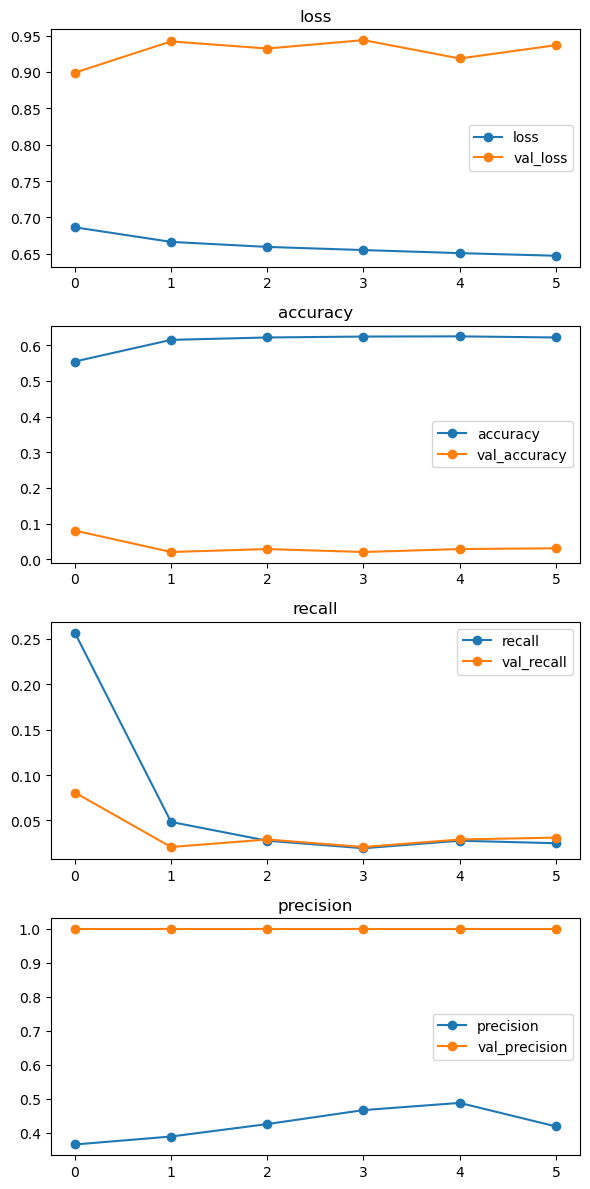

In [57]:
#visualising the history
plot_history(history);

- Learning seems to be taking place and the model doesnt seem to be over fit. Looks like early stoping wasnt needed as the model was still learning 

In [58]:
# make predictions
y_pred_test = model.predict(X_test_scaled)
y_pred_test[:5]

19/19 [==============================] - 0s 2ms/step


array([[0.31462598],
       [0.32844913],
       [0.4446957 ],
       [0.40738404],
       [0.44157985]], dtype=float32)

In [59]:
# round the predictions since sklearn doesnt recognise floats
y_pred_test = np.round(y_pred_test)
y_pred_test[:5]

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)

              precision    recall  f1-score   support

           0       0.62      0.98      0.76       372
           1       0.25      0.01      0.02       229

    accuracy                           0.61       601
   macro avg       0.43      0.50      0.39       601
weighted avg       0.48      0.61      0.48       601



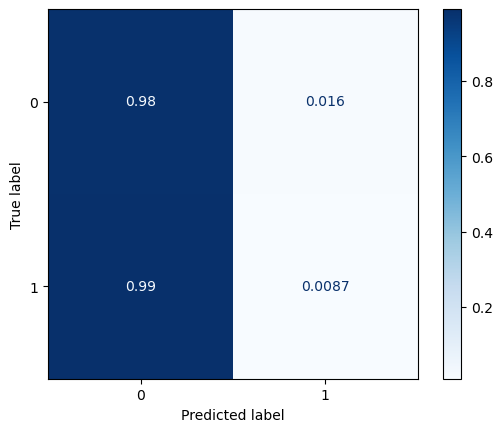

In [60]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
print(classification_report(y_test, y_pred_test))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test, cmap='Blues',
                                       normalize='true');

looks like our model isnt doing so well on unseen data

In [61]:
from keras_tuner import HyperParameters as hp
import keras_tuner as kt

In [62]:
# Make a folder to store results of hyperparameter tuning
import os
folder = 'KerasTuner_P4/'
os.makedirs(folder, exist_ok=True)

In [63]:
# Build and Compile Model within a function to try different optimizers, units, and dropout values
def build_model(hp):
    # Instantiate Model
    model = Sequential()
    # First hidden layer
    model.add(Dense(20, # How many neurons you have in your first hidden layer
                input_dim =input_shape, # What is the shape of your input features (number of columns)
                activation = 'relu')) # What activation function are you using?
    # Try different values for units
    model.add(Dense(units=hp.Int('units', min_value=10, max_value=50, step=5), activation='relu'))
    # Try different values for dropout rate
    model.add(Dropout(hp.Float(name="dropout_value", min_value=0.0, max_value=0.5, step=0.1)))
    model.add(Dense(1, activation = 'sigmoid'))

    # Compile Model
    # Try different optimizers
    model.compile(optimizer=hp.Choice('optimizer',['rmsprop','nadam','adam']),
                  loss='bce',
                  metrics=['accuracy',
                           tf.keras.metrics.Recall(name='recall'),
                           tf.keras.metrics.Precision(name='precision')])
    return model

In [64]:
# Define tuner object
tuner = kt.Hyperband(build_model,
                     objective='val_accuracy',
                     max_epochs=100,
                     directory=folder,
                     overwrite = True,
                     seed = 42,
                     project_name='P4_tunning')

In [65]:
# Run the tuner
epochs = 100
tuner.search(X_train_sm, y_train_sm,  epochs=epochs,
             validation_split=0.2, callbacks = [early_stopping])

Trial 172 Complete [00h 00m 04s]
val_accuracy: 0.035196688026189804

Best val_accuracy So Far: 0.6004140973091125
Total elapsed time: 00h 11m 12s
INFO:tensorflow:Oracle triggered exit


In [66]:
# Obtain best hyperparameter values
best_hps=tuner.get_best_hyperparameters()[0]
best_hps.values

{'units': 20,
 'dropout_value': 0.0,
 'optimizer': 'adam',
 'tuner/epochs': 100,
 'tuner/initial_epoch': 34,
 'tuner/bracket': 4,
 'tuner/round': 4,
 'tuner/trial_id': '0145'}

In [67]:
# Obtain best model
best_model = tuner.get_best_models()[0]
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                560       
                                                                 
 dense_1 (Dense)             (None, 20)                420       
                                                                 
 dropout (Dropout)           (None, 20)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 21        
                                                                 
Total params: 1,001
Trainable params: 1,001
Non-trainable params: 0
_________________________________________________________________


In [68]:
# Evaluate neural network with tuned optimizer, units, and dropout
result = best_model.evaluate(X_test, y_test, return_dict=True)
result

19/19 [==============================] - 1s 4ms/step - loss: 0.7512 - accuracy: 0.5241 - recall: 0.3624 - precision: 0.3722


{'loss': 0.7511792778968811,
 'accuracy': 0.5241264700889587,
 'recall': 0.3624454140663147,
 'precision': 0.37219730019569397}

In [69]:
# make predictions
y_pred_test = best_model.predict(X_test_scaled)
y_pred_test[:5]

19/19 [==============================] - 0s 3ms/step


array([[0.30437523],
       [0.15874854],
       [0.83983696],
       [0.5203752 ],
       [0.42394605]], dtype=float32)

In [70]:
# round the predictions since sklearn doesnt recognise floats
y_pred_test = np.round(y_pred_test)
y_pred_test[:5]

array([[0.],
       [0.],
       [1.],
       [1.],
       [0.]], dtype=float32)

              precision    recall  f1-score   support

           0       0.64      0.73      0.68       372
           1       0.43      0.33      0.37       229

    accuracy                           0.58       601
   macro avg       0.53      0.53      0.53       601
weighted avg       0.56      0.58      0.56       601



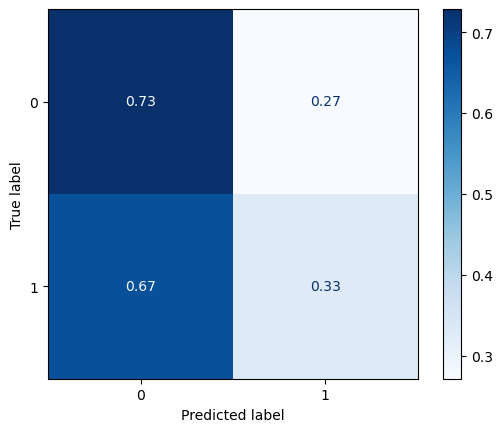

In [71]:
print(classification_report(y_test, y_pred_test))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test, cmap='Blues',
                                       normalize='true');

This is better but still not very good a model